# Predicting diamond deposits based on associated minerals.


SyntaxError: invalid syntax (<ipython-input-3-d6046437f8f4>, line 1)

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pandas_profiling
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True) 
import plotly.express as px


In [116]:
minerals = ['Kyanite',
'Clinopyroxene',
'Pyroxene',
'Orthopyroxene',
'Garnet',
'Diamond',
'Rare Earths',
'Corundum',
'Nickel',
'Chromium',
'Titanite']

In [117]:
df = pd.read_csv(r'C:/Users/Alina/.atom/sarig_md_mineralogy_exp.csv')
df=df.rename(columns={'RELATIVE_ABUNDANCE_DESC':'RELATIVE_ABUNDANCE_DESC_pr_by_vol_%'})

In [118]:
df.head()

,MINERAL_DEPOSIT_NO,DEPOSIT_NAME,MINERAL_CODE,MINERAL,MINERAL_TYPE,RELATIVE_ABUNDANCE_CODE,RELATIVE_ABUNDANCE_DESC_pr_by_vol_%,WEATHERING_PRODUCT,FORM_DISTRIBUTION,SITE_NO,EASTING_GDA2020,NORTHING_GDA2020,ZONE_GDA2020,LONGITUDE_GDA2020,LATITUDE_GDA2020,LONGITUDE_GDA94,LATITUDE_GDA94
0,17,ENTERPRISE BELTANA,BN,Bornite,ORE,TRACE,1-4 % by volume,N,Stockwork; Veinlets,210457,251540.85,6581151.56,54,138.401168,-30.876863,138.401157,-30.876849
1,17,ENTERPRISE BELTANA,CC,Chalcocite,ORE,TRACE,1-4 % by volume,Y,NaN,210457,251540.85,6581151.56,54,138.401168,-30.876863,138.401157,-30.876849
2,17,ENTERPRISE BELTANA,CCP,Chalcopyrite,ORE,RARE,<1 % by volume,N,NaN,210457,251540.85,6581151.56,54,138.401168,-30.876863,138.401157,-30.876849
3,17,ENTERPRISE BELTANA,MAL,Malachite,ORE,MINOR,5-29 % by volume,Y,Stockwork; Veinlets,210457,251540.85,6581151.56,54,138.401168,-30.876863,138.401157,-30.876849
4,17,ENTERPRISE BELTANA,QZ,Quartz,GANGUE,MAJOR,30- 70 % by volume,N,NaN,210457,251540.85,6581151.56,54,138.401168,-30.876863,138.401157,-30.876849


In [119]:

df_markers = df[df['MINERAL'].isin(minerals)]


In [120]:
df_markers.head()

,MINERAL_DEPOSIT_NO,DEPOSIT_NAME,MINERAL_CODE,MINERAL,MINERAL_TYPE,RELATIVE_ABUNDANCE_CODE,RELATIVE_ABUNDANCE_DESC_pr_by_vol_%,WEATHERING_PRODUCT,FORM_DISTRIBUTION,SITE_NO,EASTING_GDA2020,NORTHING_GDA2020,ZONE_GDA2020,LONGITUDE_GDA2020,LATITUDE_GDA2020,LONGITUDE_GDA94,LATITUDE_GDA94
70,48,DILEMMA,NI,Nickel,ORE,RARE,<1 % by volume,Y,NaN,209584,255230.95,7079061.55,53,132.546557,-26.387592,132.546548,-26.387578
563,358,LEPA,DIA,Diamond,ORE,RARE,<1 % by volume,N,NaN,210478,412920.82,6667211.52,53,134.096035,-30.123260,134.096026,-30.123246
695,446,ULTIMA DAM,GARN,Garnet,GANGUE,MINOR,5-29 % by volume,N,NaN,210391,637329.62,6377172.86,53,136.465652,-32.734707,136.465642,-32.734693
706,450,WALPUPPY,DIA,Diamond,ORE,RARE,<1 % by volume,N,NaN,210397,564700.76,6439451.52,53,135.686322,-32.179589,135.686312,-32.179575
773,476,CAMPOONA SHAFT,GARN,Garnet,GANGUE,TRACE,1-4 % by volume,N,NaN,210375,637340.69,6289211.47,53,136.479014,-33.527871,136.479004,-33.527857


In [123]:
df_markers['MINERAL'].unique() 

array(['Nickel', 'Diamond', 'Garnet', 'Pyroxene', 'Kyanite', 'Corundum',
       'Rare Earths', 'Titanite', 'Orthopyroxene', 'Clinopyroxene'],
      dtype=object)

In [124]:
len(df_markers)

174

In [125]:
len(df_markers)*0.01     # 1% of it

1.74

In [126]:
# non_top_1_perc = df.sort_values('RELATIVE_ABUNDANCE_DESC_%_by_vol',ascending=False).iloc[160:]   # grabing 99% of results

# non_top_1_perc = df_markers.sort_values('RELATIVE_ABUNDANCE_DESC_%_by_vol',ascending=False)   

In [127]:
# plt.figure(figsize=(10,6))
# sns.scatterplot(x='LONGITUDE_GDA2020',y ='LATITUDE_GDA2020',data=non_top_1_perc,edgecolor = None,alpha = 0.2, palette = 'RdYlGn',hue='RELATIVE_ABUNDANCE_DESC_%_by_vol')

# # Near by water more expencive.

https://towardsdatascience.com/meet-plotly-mapbox-best-choice-for-geographic-data-visualization-599b514bcd9a

In [141]:


fig = px.scatter_mapbox(df_markers, lat="LATITUDE_GDA2020", lon="LONGITUDE_GDA2020", color="MINERAL", zoom=5, mapbox_style='open-street-map')
fig.show()

In [129]:
# df['RELATIVE_ABUNDANCE_DESC_pr_by_vol_%'].astype(int)
# df_markers['RELATIVE_ABUNDANCE_DESC_pr_by_vol_%'].astype(str)

In [130]:
df_markers.all

<bound method DataFrame.all of        MINERAL_DEPOSIT_NO         DEPOSIT_NAME MINERAL_CODE        MINERAL  \
70                     48              DILEMMA           NI         Nickel   
563                   358                 LEPA          DIA        Diamond   
695                   446           ULTIMA DAM         GARN         Garnet   
706                   450             WALPUPPY          DIA        Diamond   
773                   476       CAMPOONA SHAFT         GARN         Garnet   
786                   477  WINCKEL AND GASKELL         GARN         Garnet   
797                   482     ST PETERS ISLAND         GARN         Garnet   
801                   482     ST PETERS ISLAND         PYRX       Pyroxene   
831                   500         DESTREES BAY         GARN         Garnet   
857                   509       MORRISON BEACH          KYN        Kyanite   
901                   518                 DAWS          COR       Corundum   
903                   518        

In [131]:
pd.options.display.max_rows

In [132]:
pd.set_option('display.max_rows', None)

In [133]:
print(df_markers)

       MINERAL_DEPOSIT_NO         DEPOSIT_NAME MINERAL_CODE        MINERAL  \
70                     48              DILEMMA           NI         Nickel   
563                   358                 LEPA          DIA        Diamond   
695                   446           ULTIMA DAM         GARN         Garnet   
706                   450             WALPUPPY          DIA        Diamond   
773                   476       CAMPOONA SHAFT         GARN         Garnet   
786                   477  WINCKEL AND GASKELL         GARN         Garnet   
797                   482     ST PETERS ISLAND         GARN         Garnet   
801                   482     ST PETERS ISLAND         PYRX       Pyroxene   
831                   500         DESTREES BAY         GARN         Garnet   
857                   509       MORRISON BEACH          KYN        Kyanite   
901                   518                 DAWS          COR       Corundum   
903                   518                 DAWS          KYN     

In [173]:
df_markers['RELATIVE_ABUNDANCE_DESC_pr_by_vol_%'] = df_markers['RELATIVE_ABUNDANCE_DESC_pr_by_vol_%'].fillna(0)

In [174]:
df_markers["RELATIVE_ABUNDANCE_DESC_pr_by_vol_%"] = df_markers["RELATIVE_ABUNDANCE_DESC_pr_by_vol_%"].str.replace(" % by volume", "")

In [175]:
df_markers["RELATIVE_ABUNDANCE_DESC_pr_by_vol_%"] = df_markers["RELATIVE_ABUNDANCE_DESC_pr_by_vol_%"].str.replace("<", "")

In [176]:
df_markers["RELATIVE_ABUNDANCE_DESC_pr_by_vol_%"] = df_markers["RELATIVE_ABUNDANCE_DESC_pr_by_vol_%"].str.replace(">", "")

https://stackoverflow.com/questions/60870063/plotly-express-choropleth-for-country-regions

In [179]:
df_markers[df_markers['RELATIVE_ABUNDANCE_DESC_pr_by_vol_%'].isna()]  # how to see NaN

,MINERAL_DEPOSIT_NO,DEPOSIT_NAME,MINERAL_CODE,MINERAL,MINERAL_TYPE,RELATIVE_ABUNDANCE_CODE,RELATIVE_ABUNDANCE_DESC_pr_by_vol_%,WEATHERING_PRODUCT,FORM_DISTRIBUTION,SITE_NO,EASTING_GDA2020,NORTHING_GDA2020,ZONE_GDA2020,LONGITUDE_GDA2020,LATITUDE_GDA2020,LONGITUDE_GDA94,LATITUDE_GDA94
1532,767,DEY HILL,KYN,Kyanite,ORE,NaN,NaN,U,Disseminated,210125,472002.38,6419361.42,54,140.702413,-32.362341,140.702403,-32.362327
4599,2120,CORUNDUM CREEK,COR,Corundum,ORE,NaN,NaN,U,As Aggregates; Disseminated,268272,337170.68,6654696.48,54,139.307968,-30.228386,139.307958,-30.228372
4600,2120,CORUNDUM CREEK,GARN,Garnet,GANGUE,NaN,NaN,U,NaN,268272,337170.68,6654696.48,54,139.307968,-30.228386,139.307958,-30.228372


In [180]:
df_markers['RELATIVE_ABUNDANCE_DESC_pr_by_vol_%'] = df_markers['RELATIVE_ABUNDANCE_DESC_pr_by_vol_%'].fillna('0')

# '0' str to keep same type

In [181]:
df_markers[df_markers['RELATIVE_ABUNDANCE_DESC_pr_by_vol_%'].isna()]

,MINERAL_DEPOSIT_NO,DEPOSIT_NAME,MINERAL_CODE,MINERAL,MINERAL_TYPE,RELATIVE_ABUNDANCE_CODE,RELATIVE_ABUNDANCE_DESC_pr_by_vol_%,WEATHERING_PRODUCT,FORM_DISTRIBUTION,SITE_NO,EASTING_GDA2020,NORTHING_GDA2020,ZONE_GDA2020,LONGITUDE_GDA2020,LATITUDE_GDA2020,LONGITUDE_GDA94,LATITUDE_GDA94


In [167]:
df_markers

,MINERAL_DEPOSIT_NO,DEPOSIT_NAME,MINERAL_CODE,MINERAL,MINERAL_TYPE,RELATIVE_ABUNDANCE_CODE,RELATIVE_ABUNDANCE_DESC_pr_by_vol_%,WEATHERING_PRODUCT,FORM_DISTRIBUTION,SITE_NO,EASTING_GDA2020,NORTHING_GDA2020,ZONE_GDA2020,LONGITUDE_GDA2020,LATITUDE_GDA2020,LONGITUDE_GDA94,LATITUDE_GDA94
70,48,DILEMMA,NI,Nickel,ORE,RARE,1,Y,NaN,209584,255230.95,7079061.55,53,132.546557,-26.387592,132.546548,-26.387578
563,358,LEPA,DIA,Diamond,ORE,RARE,1,N,NaN,210478,412920.82,6667211.52,53,134.096035,-30.123260,134.096026,-30.123246
695,446,ULTIMA DAM,GARN,Garnet,GANGUE,MINOR,5-29,N,NaN,210391,637329.62,6377172.86,53,136.465652,-32.734707,136.465642,-32.734693
706,450,WALPUPPY,DIA,Diamond,ORE,RARE,1,N,NaN,210397,564700.76,6439451.52,53,135.686322,-32.179589,135.686312,-32.179575
773,476,CAMPOONA SHAFT,GARN,Garnet,GANGUE,TRACE,1-4,N,NaN,210375,637340.69,6289211.47,53,136.479014,-33.527871,136.479004,-33.527857
786,477,WINCKEL AND GASKELL,GARN,Garnet,GANGUE,RARE,1,N,NaN,210358,627820.77,6279681.48,53,136.377886,-33.614984,136.377876,-33.614970
797,482,ST PETERS ISLAND,GARN,Garnet,GANGUE,TRACE,1-4,N,NaN,210363,363900.72,6424621.48,53,133.554344,-32.306960,133.554335,-32.306946
801,482,ST PETERS ISLAND,PYRX,Pyroxene,GANGUE,RARE,1,N,NaN,210363,363900.72,6424621.48,53,133.554344,-32.306960,133.554335,-32.306946
831,500,DESTREES BAY,GARN,Garnet,ORE,TRACE,1-4,N,NaN,210334,736551.34,6023281.69,53,137.621237,-35.906190,137.621227,-35.906176
857,509,MORRISON BEACH,KYN,Kyanite,GANGUE,RARE,1,N,NaN,210339,741130.49,6041581.45,53,137.666408,-35.740257,137.666398,-35.740243


https://datatofish.com/replace-nan-values-with-zeros/

How to fill NaN

In [202]:
def str_range_to_mean(x):
    x=x.split('-')
    avg_x = 0
    for i in x:
        avg_x+=int(i)
    avg_x/=len(x)
    return avg_x

In [204]:
df_markers['RELATIVE_ABUNDANCE_DESC_pr_by_vol_%']=[str_range_to_mean(i) for i in df_markers['RELATIVE_ABUNDANCE_DESC_pr_by_vol_%'] ]
df_markers

,MINERAL_DEPOSIT_NO,DEPOSIT_NAME,MINERAL_CODE,MINERAL,MINERAL_TYPE,RELATIVE_ABUNDANCE_CODE,RELATIVE_ABUNDANCE_DESC_pr_by_vol_%,WEATHERING_PRODUCT,FORM_DISTRIBUTION,SITE_NO,EASTING_GDA2020,NORTHING_GDA2020,ZONE_GDA2020,LONGITUDE_GDA2020,LATITUDE_GDA2020,LONGITUDE_GDA94,LATITUDE_GDA94
70,48,DILEMMA,NI,Nickel,ORE,RARE,1.0,Y,NaN,209584,255230.95,7079061.55,53,132.546557,-26.387592,132.546548,-26.387578
563,358,LEPA,DIA,Diamond,ORE,RARE,1.0,N,NaN,210478,412920.82,6667211.52,53,134.096035,-30.123260,134.096026,-30.123246
695,446,ULTIMA DAM,GARN,Garnet,GANGUE,MINOR,17.0,N,NaN,210391,637329.62,6377172.86,53,136.465652,-32.734707,136.465642,-32.734693
706,450,WALPUPPY,DIA,Diamond,ORE,RARE,1.0,N,NaN,210397,564700.76,6439451.52,53,135.686322,-32.179589,135.686312,-32.179575
773,476,CAMPOONA SHAFT,GARN,Garnet,GANGUE,TRACE,2.5,N,NaN,210375,637340.69,6289211.47,53,136.479014,-33.527871,136.479004,-33.527857
786,477,WINCKEL AND GASKELL,GARN,Garnet,GANGUE,RARE,1.0,N,NaN,210358,627820.77,6279681.48,53,136.377886,-33.614984,136.377876,-33.614970
797,482,ST PETERS ISLAND,GARN,Garnet,GANGUE,TRACE,2.5,N,NaN,210363,363900.72,6424621.48,53,133.554344,-32.306960,133.554335,-32.306946
801,482,ST PETERS ISLAND,PYRX,Pyroxene,GANGUE,RARE,1.0,N,NaN,210363,363900.72,6424621.48,53,133.554344,-32.306960,133.554335,-32.306946
831,500,DESTREES BAY,GARN,Garnet,ORE,TRACE,2.5,N,NaN,210334,736551.34,6023281.69,53,137.621237,-35.906190,137.621227,-35.906176
857,509,MORRISON BEACH,KYN,Kyanite,GANGUE,RARE,1.0,N,NaN,210339,741130.49,6041581.45,53,137.666408,-35.740257,137.666398,-35.740243


In [252]:
minerals

['Kyanite',
 'Clinopyroxene',
 'Pyroxene',
 'Orthopyroxene',
 'Garnet',
 'Diamond',
 'Rare Earths',
 'Corundum',
 'Nickel',
 'Chromium',
 'Titanite']

In [205]:
# df_markers['RELATIVE_ABUNDANCE_DESC_pr_by_vol_%'].str.split('-')

,MINERAL_DEPOSIT_NO,DEPOSIT_NAME,MINERAL_CODE,MINERAL,MINERAL_TYPE,RELATIVE_ABUNDANCE_CODE,RELATIVE_ABUNDANCE_DESC_pr_by_vol_%,WEATHERING_PRODUCT,FORM_DISTRIBUTION,SITE_NO,EASTING_GDA2020,NORTHING_GDA2020,ZONE_GDA2020,LONGITUDE_GDA2020,LATITUDE_GDA2020,LONGITUDE_GDA94,LATITUDE_GDA94
1537,770,BROWNS,KYN,Kyanite,ORE,ABUNDANT,70.0,N,Disseminated,210123,466185.63,6425541.44,54,140.640808,-32.306430,140.640798,-32.306415
11903,7786,HARLEQUIN STONE,PYRX,Pyroxene,GANGUE,MAJOR,50.0,U,NaN,832536,745140.51,6244881.45,53,137.651319,-33.907980,137.651308,-33.907966
1538,771,SPRIGGS,KYN,Kyanite,ORE,MAJOR,50.0,N,NaN,210129,465142.65,6425101.48,54,140.629713,-32.310367,140.629703,-32.310353
6952,4106,BLACK HILL MARTINS,PYRX,Pyroxene,GANGUE,MAJOR,50.0,N,NaN,477249,357380.66,6162481.46,54,139.443374,-34.669711,139.443364,-34.669697
12737,8821,MICHAEL HILLS SE,PYRX,Pyroxene,GANGUE,MAJOR,50.0,N,NaN,1414591,502550.92,7095551.47,52,129.025546,-26.259734,129.025537,-26.259720
13477,9256,MOUNT HOPE 01,GARN,Garnet,GANGUE,MINOR,17.0,N,NaN,1754508,517957.02,6264942.46,53,135.193896,-33.755444,135.193886,-33.755430
3131,1537,TRESEVEAN,GARN,Garnet,GANGUE,MINOR,17.0,N,NaN,239657,317971.06,6115960.52,54,139.003325,-35.082716,139.003315,-35.082702
2790,1465,FREEWAY NORTH,GARN,Garnet,GANGUE,MINOR,17.0,N,NaN,239389,318670.69,6112571.55,54,139.010253,-35.113384,139.010243,-35.113369
2799,1468,QUARRY,GARN,Garnet,GANGUE,MINOR,17.0,N,NaN,239394,313552.38,6110524.08,54,138.953659,-35.130899,138.953649,-35.130885
2855,1479,STRATHALBYN NORTH,GARN,Garnet,GANGUE,MINOR,17.0,N,NaN,239431,310133.66,6099127.55,54,138.913535,-35.232957,138.913525,-35.232942


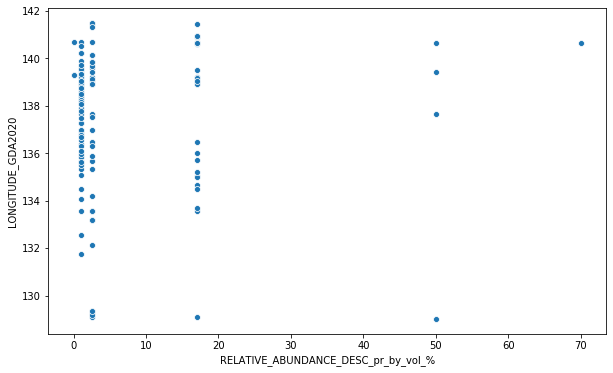

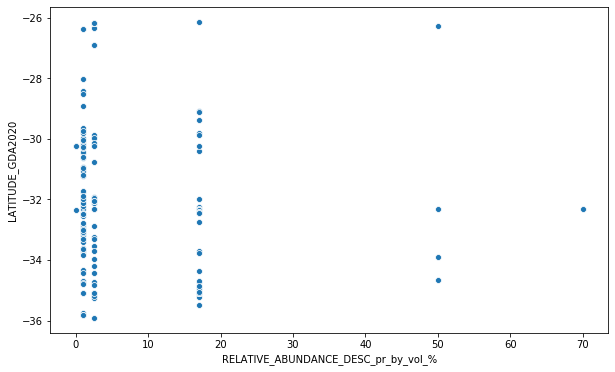

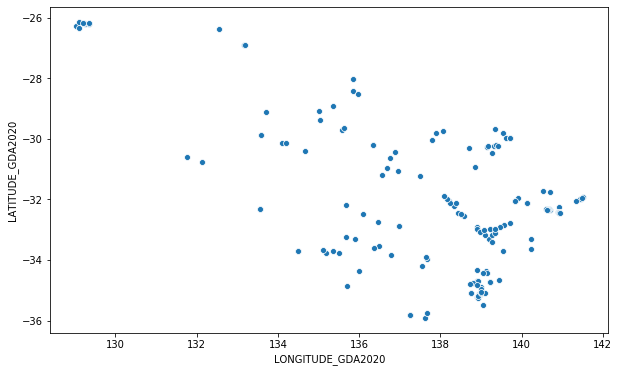

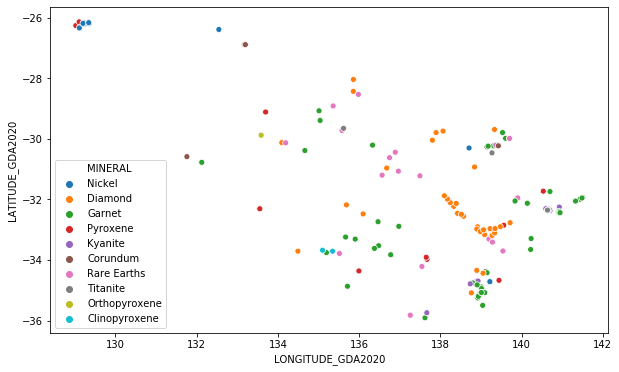

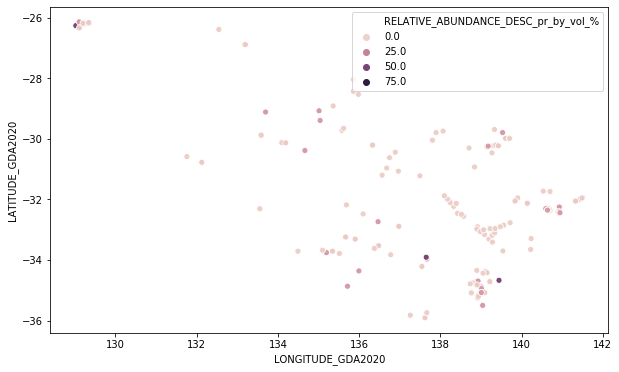

In [251]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='RELATIVE_ABUNDANCE_DESC_pr_by_vol_%',y ='LONGITUDE_GDA2020',data=df_markers)

plt.figure(figsize=(10,6))
sns.scatterplot(x='RELATIVE_ABUNDANCE_DESC_pr_by_vol_%',y ='LATITUDE_GDA2020',data=df_markers)

plt.figure(figsize=(10,6))
sns.scatterplot(x='LONGITUDE_GDA2020',y ='LATITUDE_GDA2020',data=df_markers)

plt.figure(figsize=(10,6))
sns.scatterplot(x='LONGITUDE_GDA2020',y ='LATITUDE_GDA2020',data=df_markers,hue='MINERAL')

plt.figure(figsize=(10,6))
sns.scatterplot(x='LONGITUDE_GDA2020',y ='LATITUDE_GDA2020',data=df_markers,hue='RELATIVE_ABUNDANCE_DESC_pr_by_vol_%')

df_markers.sort_values('RELATIVE_ABUNDANCE_DESC_pr_by_vol_%',ascending=False).head(20)

In [244]:
def find_match_by_mineral_and_proc(dataFrame, key_name, value_name,**kwargs):
    dataFrame = dataFrame[dataFrame[key_name].isin(kwargs.keys())]
    for k, v in kwargs.items():
        dataFrame = dataFrame[(dataFrame[key_name] != k) | (dataFrame[value_name]>=v)]
    return dataFrame

In [247]:
df_filter_1 = find_match_by_mineral_and_proc(df_markers, df_markers['MINERAL'].name,
                               df_markers['RELATIVE_ABUNDANCE_DESC_pr_by_vol_%'].name, 
                               Nickel = 2.5, Garnet=17, Diamond=1)
px.scatter_mapbox(df_filter_1, lat="LATITUDE_GDA2020", lon="LONGITUDE_GDA2020", color="MINERAL", 
                  zoom=5, mapbox_style='open-street-map').show()

In [253]:
df_filter_2 = find_match_by_mineral_and_proc(df_markers, df_markers['MINERAL'].name,
                               df_markers['RELATIVE_ABUNDANCE_DESC_pr_by_vol_%'].name, 
                               Pyroxene = 17, Kyanite=49, Titanite=1)
px.scatter_mapbox(df_filter_2, lat="LATITUDE_GDA2020", lon="LONGITUDE_GDA2020", color="MINERAL", 
                  zoom=5, mapbox_style='open-street-map').show()

In [254]:
df_markers[df_markers['MINERAL']=='Titanite']

,MINERAL_DEPOSIT_NO,DEPOSIT_NAME,MINERAL_CODE,MINERAL,MINERAL_TYPE,RELATIVE_ABUNDANCE_CODE,RELATIVE_ABUNDANCE_DESC_pr_by_vol_%,WEATHERING_PRODUCT,FORM_DISTRIBUTION,SITE_NO,EASTING_GDA2020,NORTHING_GDA2020,ZONE_GDA2020,LONGITUDE_GDA2020,LATITUDE_GDA2020,LONGITUDE_GDA94,LATITUDE_GDA94
2203,962,RADIUM HILL,TTN,Titanite,GANGUE,MINOR,17.0,N,NaN,209909,465936.66,6421157.47,54,140.638006,-32.345970,140.637996,-32.345956
2213,963,SOUTH HILL,TTN,Titanite,GANGUE,MINOR,17.0,N,NaN,209910,466250.70,6420501.51,54,140.641320,-32.351897,140.641310,-32.351883
3500,1651,JOES HILL,TTN,Titanite,GANGUE,RARE,1.0,N,NaN,831444,326580.76,6194876.72,54,139.113949,-34.372971,139.113939,-34.372956
4780,2161,MOUNT MCTAGGART,TTN,Titanite,GANGUE,RARE,1.0,N,NaN,268331,334000.72,6628721.55,54,139.270925,-30.462252,139.270915,-30.462238
11827,7525,VALLEY LODE,TTN,Titanite,GANGUE,MINOR,17.0,N,NaN,830842,465860.64,6420651.51,54,140.637180,-32.350532,140.637170,-32.350518
12571,8499,GIANTS HEAD,TTN,Titanite,ORE,RARE,1.0,N,NaN,1132531,321690.77,6650321.50,54,139.146436,-30.265672,139.146426,-30.265657
13816,9457,TAURUS,TTN,Titanite,GANGUE,RARE,1.0,N,NaN,1770324,559650.74,6719681.47,53,135.616329,-29.651410,135.616319,-29.651396


In [ ]:
# Read the query image as query_img 
# and traing image This query image 
# is what you need to find in train image 
# Save it in the same directory 
# with the name image.jpg   
mineral_spread_img = cv2.imread(r"C:\Users\Alina\Desktop\Phyton\WQU\Map\Py_MAP_without_agenda_AU.jpg") # query_img
grav_img = cv2.imread(r"C:\Users\Alina\Desktop\Phyton\WQU\Map\sa_grav_800m.jpg")             # train_img

   
# Convert it to grayscale 
mineral_spread_img_bw = cv2.cvtColor(mineral_spread_img,cv2.COLOR_BGR2GRAY) 
grav_img_bw = cv2.cvtColor(grav_img, cv2.COLOR_BGR2GRAY) 
   
# Initialize the ORB detector algorithm 
orb_initialize = cv2.ORB_create() 
   
# Now detect the keypoints and compute 
# the descriptors for the query image 
# and train image 
mineralKeypoints, mineralDescriptors = orb_initialize.detectAndCompute(mineral_spread_img_bw,None) 
gravKeypoints, gravDescriptors = orb_initialize.detectAndCompute(grav_img_bw,None) 
  
# Initialize the Matcher for matching 
# the keypoints and then match the 
# keypoints 
matcher = cv2.BFMatcher() 
matches = matcher.match(mineralDescriptors,gravDescriptors) 
   
# draw the matches to the final image 
# containing both the images the drawMatches() 
# function takes both images and keypoints 
# and outputs the matched query image with 
# its train image 
final_img = cv2.drawMatches(mineral_spread_img, mineralKeypoints,  
grav_img, gravKeypoints, matches[:20],None) 
   
final_img = cv2.resize(final_img, (1000,650)) 
  
# Show the final image 
cv2.imshow("Matches", final_img) 
cv2.waitKey(3000) 

